In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
# uncomment this if you try the tutorial and end up with low-quality images
# IPythonConsole.ipython_useSVG=True

In [49]:
#loading the csv file 
Col_name=['Name','Pub','SMILES','InverseAG','Antagon','Agonist','GBiased', 'Arrestin', 'partial', 'Comment', 'Ref']
Data=pd.read_csv('cb2_ligands - Sheet1.csv', header=None, names= Col_name, skiprows=1)

In [51]:
Data.head()

,Name,Pub,SMILES,InverseAG,Antagon,Agonist,GBiased,Arrestin,partial,Comment,Ref
0,Cannabinol,2543,CCCCCC1=CC2=C(C(=C1)O)C3=C(C=CC(=C3)C)C(O2)(C)C,0,0,0,NaN,NaN,1,Weak CB1 binder and strong CB2 agonist,NaN
1,JWH-018,10382701,CCCCCN1C=C(C2=CC=CC=C21)C(=O)C3=CC=CC4=CC=CC=C43,0,0,1,NaN,NaN,0,Strong CB1 agonist,NaN
2,Win-55212-2,5311501,CC1=C(C2=C3N1C(COC3=CC=C2)CN4CCOCC4)C(=O)C5=CC=CC6=CC=CC=C65,0,0,1,NaN,NaN,0,"Strong CB1 agonist, Alzheimer",https://pubchem.ncbi.nlm.nih.gov/compound/5311501#section=Top
3,JWH-133,6918505,CCCC(C)(C)C1=CC2=C(C=C1)C3CC(=CCC3C(O2)(C)C)C,0,0,1,NaN,NaN,0,"Strong CB2 agonist, Alzheimer, Cancer",https://pubchem.ncbi.nlm.nih.gov/compound/6918505
4,HU-210,9821569,CCCCCCC(C)(C)C1=CC2=C(C3CC(=CCC3C(O2)(C)C)CO)C(=C1)O,0,0,1,1.0,0.0,0,"Both CB1 and CB2 agonist, Alzheimer",https://pubchem.ncbi.nlm.nih.gov/compound/9821569


,Name,Pub,SMILES,InverseAG,Antagon,Agonist,GBiased,Arrestin,partial,Comment,Ref,ROMol
0,Cannabinol,2543,CCCCCC1=CC2=C(C(=C1)O)C3=C(C=CC(=C3)C)C(O2)(C)C,0,0,0,NaN,NaN,1,Weak CB1 binder and strong CB2 agonist,NaN,
1,JWH-018,10382701,CCCCCN1C=C(C2=CC=CC=C21)C(=O)C3=CC=CC4=CC=CC=C43,0,0,1,NaN,NaN,0,Strong CB1 agonist,NaN,
2,Win-55212-2,5311501,CC1=C(C2=C3N1C(COC3=CC=C2)CN4CCOCC4)C(=O)C5=CC=CC6=CC=CC=C65,0,0,1,NaN,NaN,0,"Strong CB1 agonist, Alzheimer",https://pubchem.ncbi.nlm.nih.gov/compound/5311501#section=Top,
3,JWH-133,6918505,CCCC(C)(C)C1=CC2=C(C=C1)C3CC(=CCC3C(O2)(C)C)C,0,0,1,NaN,NaN,0,"Strong CB2 agonist, Alzheimer, Cancer",https://pubchem.ncbi.nlm.nih.gov/compound/6918505,
4,HU-210,9821569,CCCCCCC(C)(C)C1=CC2=C(C3CC(=CCC3C(O2)(C)C)CO)C(=C1)O,0,0,1,1.0,0.0,0,"Both CB1 and CB2 agonist, Alzheimer",https://pubchem.ncbi.nlm.nih.gov/compound/9821569,

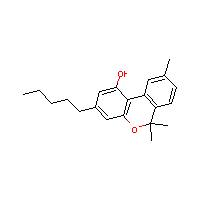
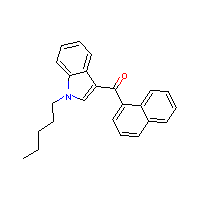
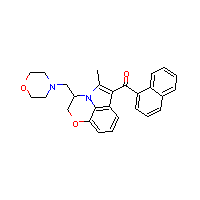
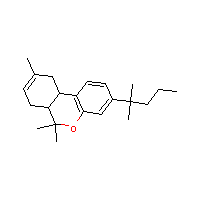
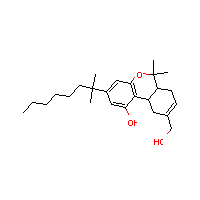

In [46]:
#converting into the RDKit mol object
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(Data, smilesCol='SMILES')
PandasTools.FrameToGridImage(Data.head(16), legendsCol='Name', molsPerRow=4)
Data = Data[~Data['ROMol'].isnull()]
Data.head()

In [6]:
#generating 2D structures
import numpy as np
from rdkit.Chem import AllChem
ms = [x for x in Data.ROMol if x is not None]
for m in ms: tmp=AllChem.Compute2DCoords(m)
#Data['2D']=ms[:]

In [7]:
#saving all molecules as a single sdf file
PandasTools.WriteSDF(Data, 'Cannabinoid.sdf', idName='Name', properties=Data.columns)

In [24]:
#loading and breaking the first molecule into fragments with the synthetic reaction path
from rdkit.Chem import BRICS
cdk2mols = Chem.SDMolSupplier('Cannabinoid.sdf')
m1 = cdk2mols[0]
sorted(BRICS.BRICSDecompose(m1))

['[16*]c1cc(O)c2c(c1)OC(C)(C)c1ccc(C)cc1-2', '[8*]CCCCC']

In [25]:
m2 = cdk2mols[10]
sorted(BRICS.BRICSDecompose(m2))

['[1*]C([6*])=O',
 '[15*]C1C2(C)CCC(C2)C1(C)C',
 '[16*]c1ccc(C)cc1',
 '[16*]c1ccc(Cl)c(C)c1',
 '[5*]N[5*]',
 '[8*]C[8*]',
 '[9*]n1nc([14*])cc1[14*]']

In [26]:
#loading and breaking all the molecule into fragments with the synthetic reaction path
allfrags=set()
for m in cdk2mols:
    pieces = BRICS.BRICSDecompose(m)
    allfrags.update(pieces)
    len(allfrags)

In [27]:
sorted(allfrags)[:]

['[1*]C(=O)CCCC[7*]',
 '[1*]C(C)=O',
 '[1*]C([6*])=O',
 '[15*]C1C2(C)CCC(C2)C1(C)C',
 '[15*]C1C=C(C)CCC1C(=C)C',
 '[16*]c1cc(O)c([16*])c(O)c1',
 '[16*]c1cc(O)c2c(c1)OC(C)(C)C1CC=C(C(=O)O)CC21',
 '[16*]c1cc(O)c2c(c1)OC(C)(C)C1CC=C(CO)CC21',
 '[16*]c1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21',
 '[16*]c1cc(O)c2c(c1)OC(C)(C)c1ccc(C)cc1-2',
 '[16*]c1cc([16*])c2c(c1)NC(C)C1CCC(O)CC21',
 '[16*]c1ccc(C)cc1',
 '[16*]c1ccc(Cl)c(C)c1',
 '[16*]c1ccc([16*])cc1',
 '[16*]c1ccc2c(c1)OC(C)(C)C1CC=C(C)CC21',
 '[16*]c1cccc2ccccc12',
 '[16*]c1ccccc1',
 '[3*]OC',
 '[3*]O[3*]',
 '[4*]C(C)CCC[8*]',
 '[4*]CC1COc2cccc3c([16*])c(C)n1c23',
 '[4*]CCN',
 '[4*]CC[8*]',
 '[5*]N1CCOCC1',
 '[5*]N[5*]',
 '[6*]C([6*])=O',
 '[7*]CCCCCC',
 '[7*]CCC[7*]',
 '[8*]C(C)(C)CCC',
 '[8*]C(C)(C)CCCCCC',
 '[8*]CCCC',
 '[8*]CCCCC',
 '[8*]CCCCCF',
 '[8*]C[8*]',
 '[9*]n1c(C)c([16*])c2ccc(I)cc21',
 '[9*]n1cc([16*])c2ccccc21',
 '[9*]n1nc([14*])cc1[14*]']

In [52]:
#generating the new compunds using the database of fragments we created
import random
random.seed(130)
fragms = [Chem.MolFromSmiles(x) for x in sorted(allfrags)]
ms = BRICS.BRICSBuild(fragms)

In [53]:
ms

<generator object BRICSBuild at 0x7f9b54858308>

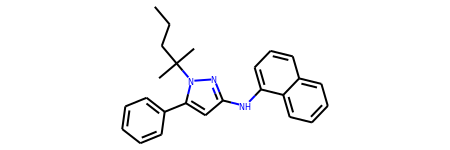

In [65]:
# you can iterate through 
products = [next(ms) for x in range(50)]
products[2]

In [66]:
# Sanitizing the molecules to check for the covalent bonds
for prod in products:
    prod.UpdatePropertyCache(strict=False)
    print(Chem.MolToSmiles(prod,True))

CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1-c1ccc2c(c1)OC(C)(C)C1CC=C(C)CC21
CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1-c1cccc2ccccc12
CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1-c1ccccc1
CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1N1CCOCC1
CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1C1C2(C)CCC(C2)C1(C)C
CCCC(C)(C)c1cc(Nc2cccc3ccccc23)nn1C(C)(C)CCC
CCCCCCC(C)(C)c1cc(Nc2cccc3ccccc23)nn1C(C)(C)CCC
CCCCc1cc(Nc2cccc3ccccc23)nn1C(C)(C)CCC
CCCCCc1cc(Nc2cccc3ccccc23)nn1C(C)(C)CCC
CCCC(C)(C)n1nc(Nc2cccc3ccccc23)cc1CCCCCF
COc1cc(Nc2cccc3ccccc23)nn1-c1cccc2ccccc12
CC1(C)Oc2cc(-c3cc(Nc4cccc5ccccc45)nn3-c3cccc4ccccc34)cc(O)c2C2CC(C(=O)O)=CCC21
CC1(C)Oc2cc(-c3cc(Nc4cccc5ccccc45)nn3-c3cccc4ccccc34)cc(O)c2C2CC(CO)=CCC21
CC1=CC2c3c(O)cc(-c4cc(Nc5cccc6ccccc56)nn4-c4cccc5ccccc45)cc3OC(C)(C)C2CC1
Cc1ccc2c(c1)-c1c(O)cc(-c3cc(Nc4cccc5ccccc45)nn3-c3cccc4ccccc34)cc1OC2(C)C
Cc1ccc(-c2cc(Nc3cccc4ccccc34)nn2-c2cccc3ccccc23)cc1
Cc1cc(-c2cc(Nc3cccc4ccccc34)nn2-c2cccc3ccccc23)ccc1Cl
CC1=CCC2C(C1)c1ccc(-c3cc(Nc4cccc5ccccc45)nn3-c3cccc4ccccc34)cc1OC2(C)C
c1ccc2

In [67]:
import csv
with open('./hypotheticalprods.csv', 'w') as f:
    writer= csv.writer(f)
    for prod in products:
        writer.writerow([Chem.MolToSmiles(prod,True)])